## Librerias

In [1]:
import numpy as np
import sympy as sym
from sympy import symbols
from sympy.solvers import solve
import matplotlib.pyplot as plt
sym.init_printing()

## Problema



Considere dos bloques de masa $m_1$ y $m_2$, el bloque $m_1$ empieza con una velocidad $v_1 = - 1 \text{ m/s}$ el bloque $m_2$ empieza en reposo. Primero el bloque 1 choca con el bloque 2 de forma elastica, luego el bloque 2 choca elasticamente contra la pared, y luego se dirige el bloque 2 de nuevo hacia el bloque 1 para chocar de nuevo elasticamente. El bloque 2 choca elasticamente varias veces contra la pared y contra el bloque 1 y se cuentan el número de choques elasticos totales, hasta que los bloques dejan de chocar.

![](https://raw.githubusercontent.com/diegour1/CompMetodosComputacionales/main/DataFiles/image9.png)

Más detalles del problema se pueden encontrar en este [link](https://www.youtube.com/watch?v=HEfHFsfGXjs&ab_channel=3Blue1Brown).



a) Si los bloques 1 y 2 tienen en cierto momento una velocidad $v_{1i}$ y $v_{2i}$ la velocidades después del choque elastico están dadas por, 

$$
v_{1f} = v_{1i}\Big(\frac{m_1-m_2}{m_1+m_2}\Big) + v_{2i}\Big(\frac{2m_2}{m_1+m_2}\Big)
$$

$$
v_{2f} = v_{1i}\Big(\frac{2m_1}{m_1+m_2}\Big) + v_{2i}\Big(\frac{m_2-m_1}{m_1+m_2}\Big)
$$

Demuestre la validez de esas dos ecuaciones con ayuda de la libreria sympy. (Imprima la ecuación simplificada que resulta de simpy)

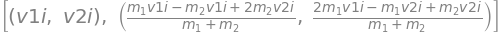

In [2]:
# su codigo aqui
m1 = symbols('m1')
m2 = symbols('m2')
v1i = symbols('v1i')
v2i = symbols('v2i')
v1f = symbols('v1f')
v2f = symbols('v2f')

# Se define el sistema de ecuaciones
eq1 = sym.Eq(m1*v1i + m2*v2i, m1*v1f + m2*v2f)
eq2 = sym.Eq((m1*v1i**2)/2 + (m2*v2i**2)/2, (m1*v1f**2)/2 + (m2*v2f**2)/2)

# Se resuelve el sistema de ecuaciones
sol = solve([eq1, eq2], [v1f, v2f])
symplyfi_sol = np.zeros(2, dtype=object)
symplyfi_sol[0] = np.zeros(2, dtype=object)
symplyfi_sol[1] = np.zeros(2, dtype=object)

symplyfi_sol[1][0] = sym.sympify(sol[1][0])
symplyfi_sol[1][1] = sym.sympify(sol[1][1])

sym.factor(sol)

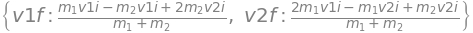

In [3]:
eq3 = sym.Eq(v1f, v1i*(m1-m2)/(m1+m2) + v2i*(2*m2)/(m1+m2))
eq4 = sym.Eq(v2f, v1i*(2*m1)/(m1+m2) + v2i*(m2-m1)/(m1+m2))

sol2 = solve([eq3, eq4], [v1f, v2f])

sol2

Vemos que ambas ecuaciones son iguales

b) Cree la función `num_collisions(m1, m2)` que reciba las masas $m_1$ y $m_2$ de los bloques 1 y 2 respectivamente, y retorne el número de choques totales `count`, la velocidad inicial del bloque 1 es $v_1 = -1 \text{ m/s}$ y el bloque 2 empieza en reposo.

In [4]:
def num_collisions(m1, m2):
    count = 0
    t = np.linspace(0, 10000, 100000)
    dt = t[1] - t[0]

    x1 = np.zeros(len(t))
    x2 = np.zeros(len(t))
    v1 = np.zeros(len(t))
    v2 = np.zeros(len(t))

    x1[0] = 10  #m
    x2[0] = 5  #m
    v1[0] = -1  #m/s
    v2[0] = 0  #m/s

    for i in range(1, len(t)):
        x1[i] = x1[i - 1] + v1[i - 1] * dt
        x2[i] = x2[i - 1] + v2[i - 1] * dt
        if x1[i] <= x2[i]:
            count += 1
            v1[i] = (v1[i - 1] * (m1 - m2) / (m1 + m2) + v2[i - 1] * (2 * m2) /
                     (m1 + m2))
            v2[i] = (v1[i - 1] * (2 * m1) / (m1 + m2) + v2[i - 1] * (m2 - m1) /
                     (m1 + m2))
        else:
            if x2[i] <= 0:
                v2[i - 1] = abs(v2[i - 1])
                count += 1
            if x1[i] >= x2[i]:
                v1[i] = v1[i - 1]
                v2[i] = v2[i - 1]
    return count


In [5]:
# codigo para la verificacion no modificar
print(num_collisions(1, 1))
print(num_collisions(10, 1))
print(num_collisions(100, 1))
print(num_collisions(1000, 1))
print(num_collisions(10000, 1))
print(num_collisions(100000, 1))
print(num_collisions(1000000, 1))
print(num_collisions(10000000, 1))
print(num_collisions(100000000, 1))

3
10
31
99
314
993
3141
9934
31415


c)¿ Cómo resolvería el problema analíticamente ? (Sin ver las soluciones en internet) (No hay soluciones correctas)


Tendriamos que realizar un proceso iterativo en el que calculemos las velocidades despues de cada choque hasta que la velocidad del bloque 1 fuera mayor a la del bloque 2 con lo que ya no habria mas choques.
